Extracting data from PDF is one common task we want to automate.

- The general structure of a PDF file is composed of the following code componets: Header, Body, Cross-Reference (xref) table, and Trailer.

- Ther header contains just one line that identifies the version of PDF. (e.g. \%PDF-1.5)

- The trailer contains pointers to the xref table and to key objects contained in the trailer dictionary. It ends with \%%%EOF to identify end of file.

- The xref table contains pointer to all the objects included in the PDF file. It identifies how many objects are in the table, where the objects begins (the offsets), and its length in bytes.

- The body contains all the object information - Font, Images, Words, Bookmarks, from Field and so on.

pip3 install camelot-py

pip3 install opencv-python

In [1]:
import camelot as cm

In [2]:
input_pdf = cm.read_pdf("https://www.undp.org/content/dam/india/docs/india_factsheet_economic_n_hdi.pdf"\
                        ,flavor='stream', pages='1,2')

In [3]:
input_pdf

<TableList n=4>

In [4]:
for table in input_pdf:
    print(table)

<Table shape=(35, 4)>
<Table shape=(22, 4)>
<Table shape=(16, 4)>
<Table shape=(26, 2)>


In [5]:
input_pdf[0].df

,0,1,2,3
0,Economic and Human Development Indicators,,,
1,,,Year,Year
2,,Demographic Indicators,2001,2011
3,1,Total Population (In Billions),1.028,1.21
4,2,Sex Ratio (females per 1000 males),933,940
5,3,Child Sex Ratio (females per 1000 males),927,914
6,,Economic Indicators,2005-06,2010
7,4,Gross Domestic Product (Current US $) (millions),834035,1727111
8,,,2005-06,2009-10
9,5,Contribution of Agriculture to GDP (%),,14.62


In [6]:
df = input_pdf[0].df.loc[32:34,1:3]
df

,1,2,3
32,Literacy Rate (%),64.8,74.04
33,Male Literacy Rate (%),75.3,82.14
34,Female Literacy Rate (%),53.7,65.46


In [7]:
df = df.reset_index(drop=True)
df

,1,2,3
0,Literacy Rate (%),64.8,74.04
1,Male Literacy Rate (%),75.3,82.14
2,Female Literacy Rate (%),53.7,65.46


In [8]:
df.columns=['KPI', '2001', '2011']
df

,KPI,2001,2011
0,Literacy Rate (%),64.8,74.04
1,Male Literacy Rate (%),75.3,82.14
2,Female Literacy Rate (%),53.7,65.46


In [9]:
df.loc[:,['2001','2011']] = df.loc[:,['2001','2011']].astype(float)
df

,KPI,2001,2011
0,Literacy Rate (%),64.8,74.04
1,Male Literacy Rate (%),75.3,82.14
2,Female Literacy Rate (%),53.7,65.46


In [10]:
#df.to_csv('table_from_pdf.csv', index=False)

In [11]:
#df.to_excel('table_from_pdf.xlsx')

In [12]:
import pandas as pd
import seaborn as sns

In [13]:
#df2 = pd.read_csv('table_from_pdf.csv')

.melt converts data from a "wide" format to a "long" format

In this example, we keep 'KPI' as a column and bring the columns not mentioned to a single column called 'year' (var_name)

In [14]:
df_melted = df.melt('KPI', var_name='year', value_name='percentage')
df_melted

,KPI,year,percentage
0,Literacy Rate (%),2001,64.8
1,Male Literacy Rate (%),2001,75.3
2,Female Literacy Rate (%),2001,53.7
3,Literacy Rate (%),2011,74.04
4,Male Literacy Rate (%),2011,82.14
5,Female Literacy Rate (%),2011,65.46


<AxesSubplot:xlabel='KPI', ylabel='percentage'>

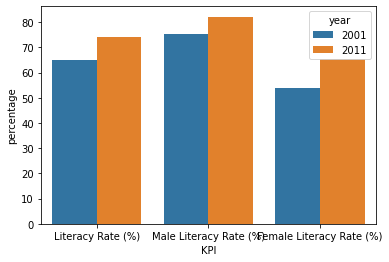

In [15]:
sns.barplot(x='KPI', y='percentage', hue='year', data=df_melted)